In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The dataset `Aerial_Waterfowl_Survey_Data.csv` shows counts of various species of waterfowl observed during aerial surveys:

In [14]:
birds = pd.read_csv("Aerial_Waterfowl_Survey_Data.csv")
birds

,Year,Month,Time Period,Survey Sequence,Zone,Atlantic Brant,Canada Goose,Snow Goose,Greater White-fronted Goose,American Black Duck,...,White-winged Scoter,Surf Scoter,Black Scoter,Scoters,Bufflehead,Common Goldeneye,Long-tailed Duck,Mute Swan,Tundra Swan,American Coot
0,2019,November,NaN,219.0,1.0,0,2041,0,0,0,...,0,0,0,0,30,0,0,0,0,0
1,2019,November,NaN,219.0,2.0,0,1381,0,0,42,...,0,0,0,0,0,0,0,7,26,25
2,2019,November,NaN,219.0,3.0,0,7678,0,0,165,...,0,0,0,0,60,0,0,0,57,0
3,2019,November,NaN,219.0,4.0,0,6332,0,0,228,...,0,0,0,0,12,0,0,0,0,0
4,2019,November,NaN,219.0,5.0,0,5439,20000,0,329,...,0,0,0,0,0,0,0,2,163,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,2021,January,NaN,NaN,7.0,0,4282,16301,0,2650,...,0,0,41,0,0,6,0,0,319,0
2041,2021,January,NaN,NaN,8.0,0,32,5912,0,233,...,0,0,0,0,27,0,0,0,0,0
2042,2021,January,NaN,NaN,9.0,675,190,0,0,60,...,0,0,6,0,1480,0,2,0,0,0
2043,2021,January,NaN,NaN,10.0,500,1392,0,0,102,...,0,0,0,0,181,0,0,0,0,0


## 1.
(2.1) Make a data frame called `ducks` for just the species *American Black Duck*, *Mallard*, *Ruddy Duck*, and *Ring-necked Duck*. Make a series called `duckmeans` for the means of those 4 columns.

In [ ]:
ducks = None
duckmeans = None

ducks = birds[["American Black Duck", "Mallard", "Ruddy Duck", "Ring-necked Duck"]]

duckmeans = ducks.mean()

print(ducks.head(5))
print()
print(duckmeans)

   American Black Duck  Mallard  Ruddy Duck  Ring-necked Duck
0                    0       26           0                 0
1                   42       32           4                 0
2                  165      527          65                 0
3                  228      613           0                 0
4                  329     1031         250                 0

American Black Duck    887.909046
Mallard                833.096333
Ruddy Duck              80.063081
Ring-necked Duck        33.460147
dtype: float64


In [7]:
# TESTS
assert np.isclose(duckmeans.sum(), 1834.528606356), "The mean values are incorrect"
assert len(ducks.columns) == 4, "Wrong number of columns in ducks"
print("OK")

OK


In [ ]:
# Intentionally blank--do not delete

## 2.
(2.1) For the *Canada Goose* column of `birds`, assign `CGmu` the value of the mean, assign `CGsigma` the value of the standard deviation, and let `CGZ` be a series of the z-scores of the column.

In [8]:
CGmu = None
CGsigma = None
CGZ = None

CGmu = birds["Canada Goose"].mean()
CGsigma = birds["Canada Goose"].std()

CGZ = (birds["Canada Goose"] - CGmu) / CGsigma

print(f"mean for Canada Goose: {CGmu:.2f}")
print(f"std for Canada Goose: {CGsigma:.2f}")

mean for Canada Goose: 4621.41
std for Canada Goose: 7134.99


In [9]:
# TESTS
assert np.isclose(CGZ.mean(), 0), "The mean of CGZ should be near zero"
assert np.isclose(CGZ.std(), 1), "The standard deviation of CGZ should be near 1"
assert len(CGZ) == birds.shape[0], "CGZ should have the same number of rows as birds"
assert np.isclose(CGZ.median(), -0.34007213204), "The CGZ values are incorrect"
print("OK")

OK


In [ ]:
# Intentionally blank--do not delete

## 3.
(2.1) Let `IQR` be a series of the interquartile ranges of all the columns of *birds* after the 5th, keeping only the values greater than zero.

In [ ]:
IQR = None

birds_subset = birds.iloc[:, 5:]

IQR = birds_subset.quantile(0.75) - birds_subset.quantile(0.25)

IQR = IQR[IQR > 0]
IQR

Canada Goose                  5153.0
Snow Goose                    5900.0
American Black Duck           1153.0
Mallard                        798.0
Northern Pintail               310.0
American Green-winged Teal     522.0
Gadwall                         95.0
American Wigeon                 20.0
Northern Shoveler               50.0
Mergansers                       2.0
Ruddy Duck                      10.0
Bufflehead                      11.0
Tundra Swan                      2.0
dtype: float64

In [11]:
# TESTS
assert type(IQR) == pd.Series, "IQR should be a pandas Series"
assert np.isclose(IQR.sum(), 14026), "The sum of IQR values is incorrect"
assert np.isclose(IQR["Snow Goose"], 5900), "The Snow Goose IQR value is incorrect"
print("OK")

OK


In [ ]:
# Intentionally blank--do not delete

## 4.
(2.2) Plot the empirical CDF of the *Snow Goose* column using only the rows in which *Zone* equals 3.

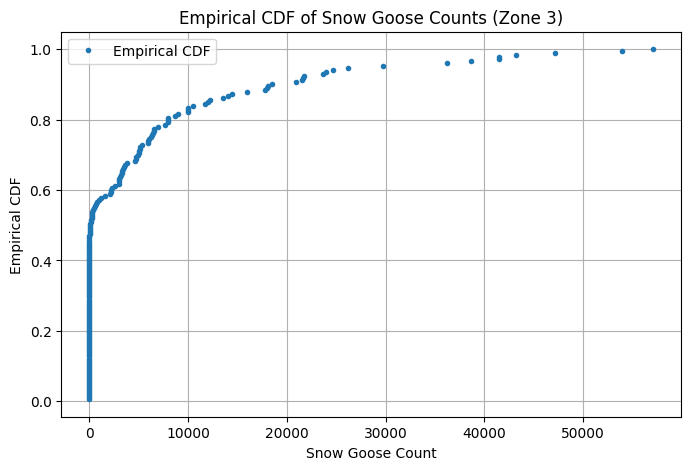

In [13]:
import matplotlib.pyplot as plt
zone3_data = birds[birds["Zone"] == 3]["Snow Goose"]

# Sort data for CDF calculation
sorted_data = np.sort(zone3_data)
n = len(sorted_data)

# Compute empirical CDF values
ecdf = np.arange(1, n + 1) / n

# Plot the empirical CDF
plt.figure(figsize=(8, 5))
plt.plot(sorted_data, ecdf, marker=".", linestyle="none", label="Empirical CDF")
plt.xlabel("Snow Goose Count")
plt.ylabel("Empirical CDF")
plt.title("Empirical CDF of Snow Goose Counts (Zone 3)")
plt.grid(True)
plt.legend()
plt.show()

## 5.
(2.2) Plot a histogram with 25 bins for the **positive entries only** in the *Bufflehead* column.

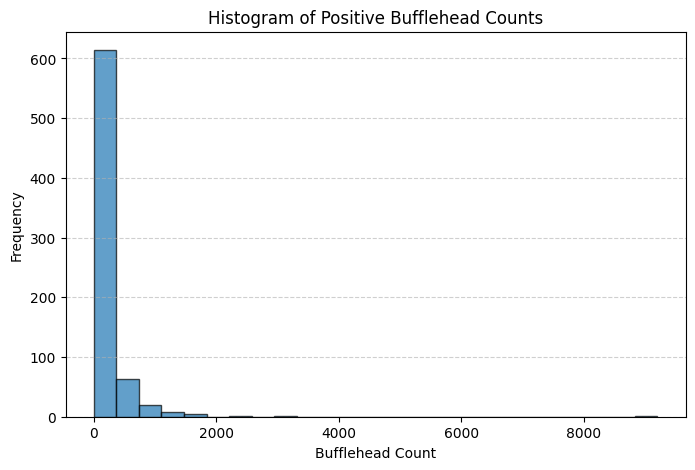

In [16]:
import matplotlib.pyplot as plt

bufflehead_positive = birds[birds["Bufflehead"] > 0]["Bufflehead"]
plt.figure(figsize=(8, 5))
plt.hist(bufflehead_positive, bins=25, edgecolor="black", alpha=0.7)
plt.xlabel("Bufflehead Count")
plt.ylabel("Frequency")
plt.title("Histogram of Positive Bufflehead Counts")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## 6.
(2.3) Make a series called `canada` of the total number of *Canada Goose* observed in each zone. I.e., the index has the zone numbers, and the values are the total number in each zone.

In [17]:
canada = None
canada = birds.groupby("Zone")["Canada Goose"].sum()

print(canada)

Zone
1.0      822475
2.0      238779
3.0     1968090
4.0     1215365
5.0     2653983
6.0     1020605
7.0      891267
8.0      312775
9.0      116060
10.0      62120
11.0     143104
Name: Canada Goose, dtype: int64


In [18]:
# TESTS
assert type(canada) == pd.Series, "canada should be a pandas Series"
assert len(canada) == 11, "canada should have 11 values"
assert canada[3.0] == 1968090, "The value for Zone 3 is incorrect"
print("OK")

OK


In [ ]:
# Intentionally blank--do not delete

## 7.

(2.3) Make a box plot, grouped by month, of the *Snow Goose* counts for all the years since 2000 (inclusive).

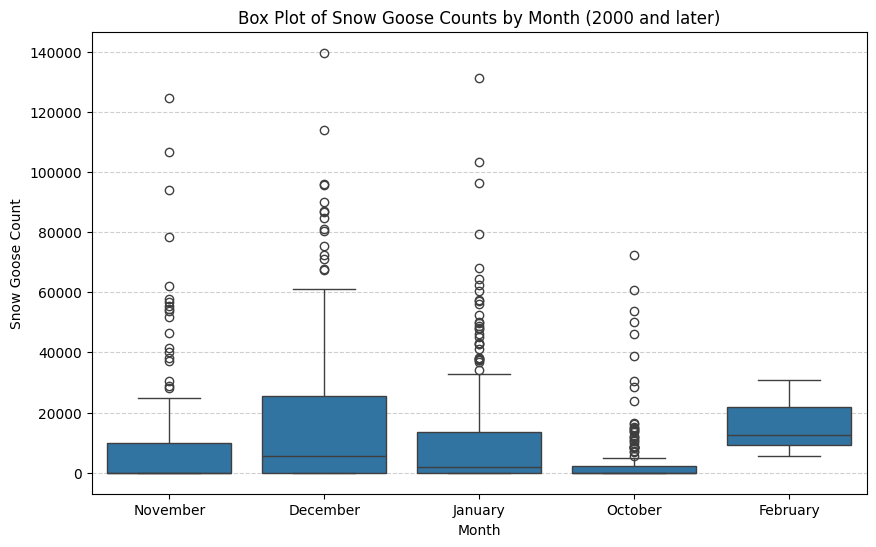

In [19]:
birds_filtered = birds[birds["Year"] >= 2000]

plt.figure(figsize=(10, 6))
sns.boxplot(data=birds_filtered, x="Month", y="Snow Goose")

plt.xlabel("Month")
plt.ylabel("Snow Goose Count")
plt.title("Box Plot of Snow Goose Counts by Month (2000 and later)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

## 8.
(2.4) Produce code to count the total number of outliers for December in the previous plot and assign to `numOutliersDec`.

In [24]:
birds_filtered = birds[birds["Year"] >= 2000]

december_data = birds_filtered[birds_filtered["Month"] == 12]["Snow Goose"].dropna()

Q1 = december_data.quantile(0.25)
Q3 = december_data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numOutliersDec = ((december_data < lower_bound) | (december_data > upper_bound)).sum()

print(numOutliersDec)

0


In [ ]:
# TESTS
assert numOutliersDec > 10, "There should be more than 10 outliers in December"
assert numOutliersDec < 25, "There should be fewer than 25 outliers in December"
print("OK")

AssertionError: There should be more than 10 outliers in December

In [ ]:
# Intentionally blank--do not delete

## 9. 
(2.5) Create a 4x4 grid of pairwise scatter plots for the `ducks` frame from #1.

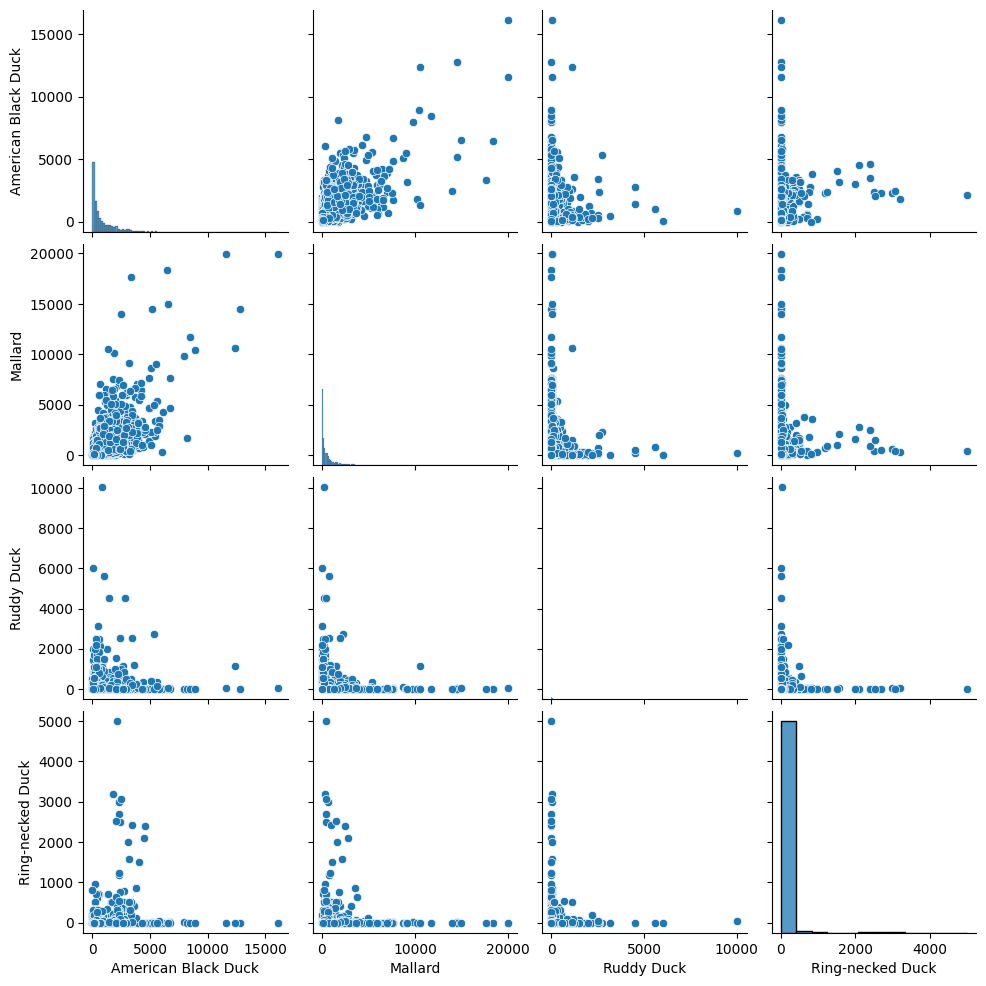

In [26]:
ducks = birds[["American Black Duck", "Mallard", "Ruddy Duck", "Ring-necked Duck"]]

sns.pairplot(ducks)

plt.show()

## 10.
(2.5) Assign to `duckduck` a dataframe of the Pearson correlation coefficients between all pairings of the four species in `ducks`.

In [27]:
duckduck = None
birds = pd.read_csv("Aerial_Waterfowl_Survey_Data.csv")

ducks = birds[["American Black Duck", "Mallard", "Ruddy Duck", "Ring-necked Duck"]]

duckduck = ducks.corr()

print(duckduck)
duckduck

                     American Black Duck   Mallard  Ruddy Duck  \
American Black Duck             1.000000  0.675320    0.047833   
Mallard                         0.675320  1.000000   -0.027621   
Ruddy Duck                      0.047833 -0.027621    1.000000   
Ring-necked Duck                0.151984  0.009756   -0.006932   

                     Ring-necked Duck  
American Black Duck          0.151984  
Mallard                      0.009756  
Ruddy Duck                  -0.006932  
Ring-necked Duck             1.000000  


,American Black Duck,Mallard,Ruddy Duck,Ring-necked Duck
American Black Duck,1.000000,0.675320,0.047833,0.151984
Mallard,0.675320,1.000000,-0.027621,0.009756
Ruddy Duck,0.047833,-0.027621,1.000000,-0.006932
Ring-necked Duck,0.151984,0.009756,-0.006932,1.000000


In [28]:
# TESTS
assert type(duckduck) == pd.DataFrame, "duckduck should be a DataFrame"
assert duckduck.shape == (4, 4), "duckduck should be a 4x4 DataFrame"
assert np.isclose(duckduck.loc['Mallard', 'Ruddy Duck'], -0.027620580191), "A correlation value is incorrect"
print("OK")

OK


In [ ]:
# Intentionally blank--do not delete

## 11.
(2.5)
Repeat the previous problem, but using Spearman coefficients, and call the result `spearduck`.

In [29]:
spearduck = None
birds = pd.read_csv("Aerial_Waterfowl_Survey_Data.csv")

ducks = birds[["American Black Duck", "Mallard", "Ruddy Duck", "Ring-necked Duck"]]

spearduck = ducks.corr(method='spearman')

print(spearduck)

spearduck

                     American Black Duck   Mallard  Ruddy Duck  \
American Black Duck             1.000000  0.722257    0.182245   
Mallard                         0.722257  1.000000    0.063449   
Ruddy Duck                      0.182245  0.063449    1.000000   
Ring-necked Duck                0.238072  0.162817    0.141576   

                     Ring-necked Duck  
American Black Duck          0.238072  
Mallard                      0.162817  
Ruddy Duck                   0.141576  
Ring-necked Duck             1.000000  


,American Black Duck,Mallard,Ruddy Duck,Ring-necked Duck
American Black Duck,1.000000,0.722257,0.182245,0.238072
Mallard,0.722257,1.000000,0.063449,0.162817
Ruddy Duck,0.182245,0.063449,1.000000,0.141576
Ring-necked Duck,0.238072,0.162817,0.141576,1.000000


In [30]:
# TESTS
assert type(spearduck) == pd.DataFrame, "spearduck should be a DataFrame"
assert np.isclose(spearduck.loc['Mallard', 'Ruddy Duck'], 0.0634493133516), "A correlation value is incorrect"
print("OK")

OK


In [ ]:
# Intentionally blank--do not delete